In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Возьмите датасет Mortality and Water Hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности



In [2]:
df = pd.read_csv('water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [3]:
df.drop('Unnamed: 0', axis= 1 , inplace= True )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [5]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


На смертность влияет очень много факторов, от качества среды до экономических социальных показателей. Искать взаимосвязь смертности и только лишь жесткости воды некорректно

ГИПОТЕЗА:

Взаимосвязи такой нет, либо она очень слаба.



<AxesSubplot:xlabel='hardness', ylabel='mortality'>

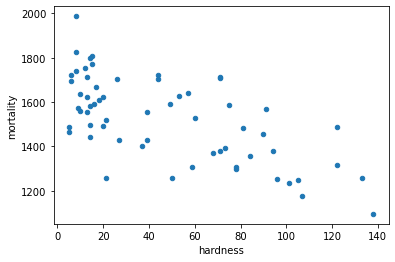

In [6]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [7]:
# считаем коэф. корреляции Пирсона
df.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
# считаем коэф. корреляции Спирмана
df.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [9]:
# считаем коэф. корреляции Кенделла
df.corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


Исходя из полученных коэффициентов, можно сделать противоречивый вывод, что чем выше жесткость воды, тем меньше смертность..

Рекомендации всемирной организации здравоохранения (ВОЗ) для питьевой воды: кальций – 20-80 мг/л

Сова на глобус:

Чем хуже окружающая среда, тем больше усилий тратят на снижение воздействия такой среды на человека. 

В случае с жесткой водой можно предположить, что люди покупают либо очищенную воду, либо устанавливают водоочистные фильтры.



In [70]:
# построим модель линейной регрессии

X = df[['hardness']]
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
X_train.shape

(42, 1)

In [72]:
X_test.shape

(19, 1)

In [73]:
y_train.shape

(42,)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
model.coef_

array([-3.13167087])

In [76]:
model.intercept_

1668.9722977277095

In [77]:
# y = -3.13167087 * x + 1668.9722977277095

In [78]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [79]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
Name: mortality, dtype: int64

In [80]:
# коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

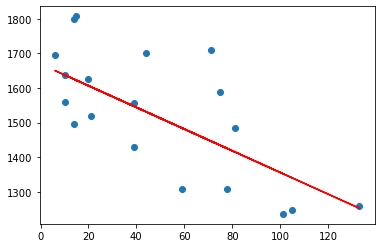

In [81]:
plt.scatter(X_test, y_test) 
plt.plot(X_test, y_pred, c='r')

In [82]:
res = y_test - y_pred
res

0     -93.146856
5     -79.655589
46   -130.128906
31    170.821221
13   -117.701970
55     18.661120
34      6.539928
49    152.903018
12    -84.207209
40     45.817728
33   -175.203716
59     69.693043
16      8.162866
3     174.871094
53    262.376334
17   -118.837134
8      -0.655589
6     185.002765
41   -116.673540
Name: mortality, dtype: float64

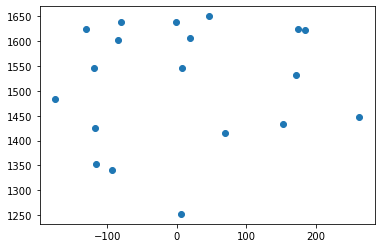

In [84]:
plt.scatter(res, y_pred) # график остатков

Разделим данные на группы - для южных городов и северных

In [22]:
df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']

In [23]:
df_south.describe()

,mortality,hardness
count,26.000000,26.000000
mean,1376.807692,69.769231
std,140.269175,40.360682
min,1096.000000,5.000000
25%,1259.250000,40.250000
50%,1364.000000,75.500000
75%,1485.750000,99.750000
max,1627.000000,138.000000


In [24]:
df_north.describe()

,mortality,hardness
count,35.000000,35.000000
mean,1633.600000,30.400000
std,136.936911,26.134494
min,1378.000000,6.000000
25%,1557.500000,12.500000
50%,1637.000000,17.000000
75%,1718.000000,44.000000
max,1987.000000,94.000000


<AxesSubplot:title={'center':'Southern cities'}, xlabel='hardness', ylabel='mortality'>

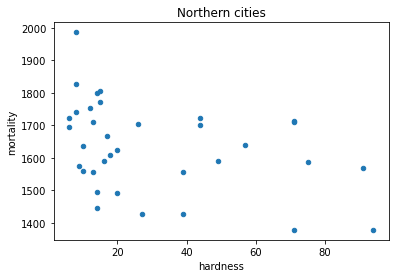

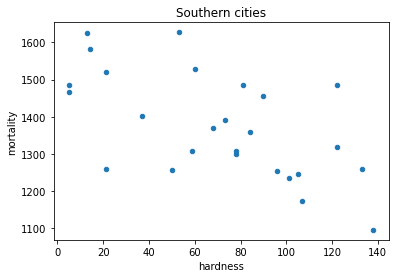

In [25]:
df_north.plot(kind='scatter', x='hardness', y='mortality', title='Northern cities')
df_south.plot(kind='scatter', x='hardness', y='mortality', title='Southern cities')

Видно сильное рассеяние показаний, особенно у южных городов. Считаю, что нет взаимосвязи между y и Х. 

Посчитаем каждую группу 

Север:

In [26]:
# считаем коэф. корреляции Спирмана
df_north.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [27]:
# считаем коэф. корреляции Пирсона
df_north.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [28]:
# считаем коэф. корреляции Кенделла
df_north.corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


Модель линейной регрессии для Севера

In [29]:
X = df_north[['hardness']]
y = df_north['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
X_train.shape

(24, 1)

In [31]:
X_test.shape

(11, 1)

In [32]:
y_train.shape

(24,)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
model.coef_

array([-1.97686226])

In [35]:
model.intercept_

1688.150229031281

In [36]:
# y = -1.9769 * x + 1688.150229031281

In [37]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [38]:
y_test

45    1987
23    1574
43    1444
36    1724
26    1591
50    1713
31    1702
22    1742
16    1555
28    1772
17    1428
Name: mortality, dtype: int64

In [39]:
model.score(X_test, y_test) # коэффициент детерминации

0.018885304285745863

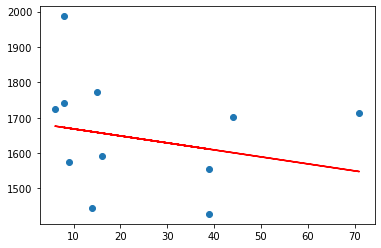

In [40]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [85]:
res_north = y_test - y_pred
res_north

0     -93.146856
5     -79.655589
46   -130.128906
31    170.821221
13   -117.701970
55     18.661120
34      6.539928
49    152.903018
12    -84.207209
40     45.817728
33   -175.203716
59     69.693043
16      8.162866
3     174.871094
53    262.376334
17   -118.837134
8      -0.655589
6     185.002765
41   -116.673540
Name: mortality, dtype: float64

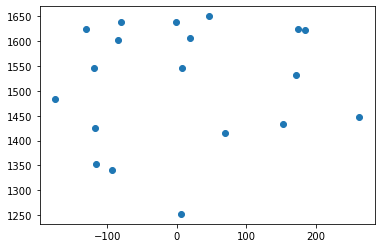

In [86]:
plt.scatter(res_north, y_pred)

Коэффициент детерминации почти равен нулю, что подтверждает гипотезу.

Юг:

In [41]:
df_south.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [42]:
df_south.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [43]:
df_south.corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


Модель линейной регрессии для Юга

In [44]:
X = df_south[['hardness']]
y = df_south['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
X_train.shape

(18, 1)

In [46]:
X_test.shape

(8, 1)

In [47]:
y_train.shape

(18,)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.coef_

array([-3.51342921])

In [50]:
model.intercept_

1640.2204603423374

In [51]:
# y = -3.51342921 * x + 1640.2204603423374

In [52]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [53]:
y_test

18    1318
38    1486
0     1247
58    1486
27    1402
19    1260
33    1309
2     1466
Name: mortality, dtype: int64

In [54]:
model.score(X_test, y_test) # коэффициент детерминации

-2.5519223012352077

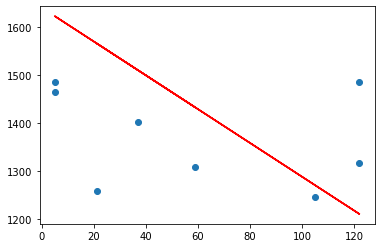

In [55]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [87]:
res_south = y_test - y_pred
res_south

0     -93.146856
5     -79.655589
46   -130.128906
31    170.821221
13   -117.701970
55     18.661120
34      6.539928
49    152.903018
12    -84.207209
40     45.817728
33   -175.203716
59     69.693043
16      8.162866
3     174.871094
53    262.376334
17   -118.837134
8      -0.655589
6     185.002765
41   -116.673540
Name: mortality, dtype: float64

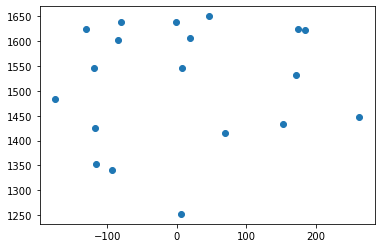

In [88]:
plt.scatter(res_south, y_pred)

В случае с южными городами коэффициент детерминации вообще отрицательный, что характеризует построенную модель как неадекватную.

Вывод: Нет взаимосвязи между смертностью и жесткостью воды. 